Project 1 - Mental Health in Tech

By: Matthew Idle, Chad Fletcher, Lori Vitaioli, Brady Ogega, Cindy Hansel, Heather Shoberg, Jennifer White

In [299]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pprint import pprint
from pathlib import Path

# File locations
survey_2014 = "Resources/2014-survey.csv"
survey_2016 = "Resources/2016-survey.csv"
survey_2017 = "Resources/2017-survey.csv"
survey_2018 = "Resources/2018-survey.csv"
survey_2019 = "Resources/2019-survey.csv"

# Reading the data
s_2014_data = pd.read_csv(survey_2014)
s_2016_data = pd.read_csv(survey_2016)
s_2017_data = pd.read_csv(survey_2017)
s_2018_data = pd.read_csv(survey_2018)
s_2019_data = pd.read_csv(survey_2019)


In [2]:
# retrieve desired columns from "narrowed" 2016
#desired_column_list = narrowed_2016_data.columns
desired_column_list = ['What is your age?', 'What is your gender?',
       'What country do you work in?', 'Do you work remotely?',
       'How many employees does your company or organization have?',
       'Have you had a mental health disorder in the past?',
       'Do you currently have a mental health disorder?',
       'Would you be willing to bring up a physical health issue with a potential employer in an interview?',
       'Would you bring up a mental health issue with a potential employer in an interview?',
       'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
       'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?',
       'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?',
       'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:']

# create a new dataframe for further cleaning
narrowed_2016 = s_2016_data[desired_column_list]
narrowed_2016.head()

,What is your age?,What is your gender?,What country do you work in?,Do you work remotely?,How many employees does your company or organization have?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up a mental health issue with a potential employer in an interview?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:"
0,39,Male,United Kingdom,Sometimes,26-100,Yes,No,Maybe,Maybe,No,NaN,Yes,Some of my previous employers,Very easy
1,29,male,United States of America,Never,6-25,Yes,Yes,Maybe,No,No,NaN,Yes,Some of my previous employers,Somewhat easy
2,38,Male,United Kingdom,Always,6-25,Maybe,No,Yes,Yes,Maybe/Not sure,Yes,Maybe,I don't know,Neither easy nor difficult
3,43,male,United Kingdom,Sometimes,NaN,Yes,Yes,Yes,Maybe,No,NaN,NaN,Some of my previous employers,NaN
4,43,Female,United States of America,Sometimes,6-25,Yes,Yes,Maybe,No,"Yes, I experienced",Yes,No,Some of my previous employers,Neither easy nor difficult


In [3]:
# change column names
new_column_names = ['age',  
            'original_gender',  
            'country',  
            'remote',  
            'num_employees',  
            'disorder_past',  
            'disorder_current', 
            'bring_up_phys_issue_in_interview', 
            'bring_up_mh_issue_in_interview', 
            'obs_exper_bad_resp_cur_prev', 
            'obs_of_other_inhibit_discuss_curr', 
            'comf_discuss_mh_disorder_cur_superv', 
            'willing_discuss_mh_issue_prev_superv', 
            'request_med_leave']
narrowed_2016.columns = new_column_names
narrowed_2016.head(40)

,age,original_gender,country,remote,num_employees,disorder_past,disorder_current,bring_up_phys_issue_in_interview,bring_up_mh_issue_in_interview,obs_exper_bad_resp_cur_prev,obs_of_other_inhibit_discuss_curr,comf_discuss_mh_disorder_cur_superv,willing_discuss_mh_issue_prev_superv,request_med_leave
0,39,Male,United Kingdom,Sometimes,26-100,Yes,No,Maybe,Maybe,No,NaN,Yes,Some of my previous employers,Very easy
1,29,male,United States of America,Never,6-25,Yes,Yes,Maybe,No,No,NaN,Yes,Some of my previous employers,Somewhat easy
2,38,Male,United Kingdom,Always,6-25,Maybe,No,Yes,Yes,Maybe/Not sure,Yes,Maybe,I don't know,Neither easy nor difficult
3,43,male,United Kingdom,Sometimes,NaN,Yes,Yes,Yes,Maybe,No,NaN,NaN,Some of my previous employers,NaN
4,43,Female,United States of America,Sometimes,6-25,Yes,Yes,Maybe,No,"Yes, I experienced",Yes,No,Some of my previous employers,Neither easy nor difficult
5,42,Male,United Kingdom,Sometimes,More than 1000,No,Yes,Yes,Maybe,"Yes, I experienced",No,Yes,"No, at none of my previous employers",Somewhat easy
6,30,M,United States of America,Sometimes,26-100,No,No,Yes,Yes,No,NaN,Yes,"Yes, at all of my previous employers",Somewhat easy
7,37,female,United States of America,Always,More than 1000,Yes,Yes,No,No,"Yes, I observed",Maybe,Yes,Some of my previous employers,Very easy
8,44,Female,United States of America,Sometimes,26-100,Yes,Yes,Maybe,Maybe,"Yes, I observed",No,Maybe,"No, at none of my previous employers",Very difficult
9,30,Male,United States of America,Always,NaN,Yes,Yes,Yes,Maybe,No,NaN,NaN,Some of my previous employers,NaN


In [4]:
########## clean gender column

# find unique values from free-form answers
gender_list = narrowed_2016["original_gender"].unique()
gender_list

array(['Male', 'male', 'Male ', 'Female', 'M', 'female', 'm',
       'I identify as female.', 'female ', 'Bigender', 'non-binary',
       'Female assigned at birth ', 'F', 'Woman', 'man', 'fm', 'f',
       'Cis female ', 'Transitioned, M2F', 'Genderfluid (born female)',
       'Other/Transfeminine', 'Female or Multi-Gender Femme', 'Female ',
       'woman', 'female/woman', 'Cis male', 'Male.', 'Androgynous',
       'male 9:1 female, roughly', nan, 'Male (cis)', 'Other',
       'nb masculine', 'Cisgender Female', 'Man', 'Sex is male',
       'none of your business', 'genderqueer', 'cis male', 'Human',
       'Genderfluid', 'Enby', 'Malr', 'genderqueer woman', 'mtf', 'Queer',
       'Agender', 'Dude', 'Fluid',
       "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'fem', 'Nonbinary', 'male ',
       'human', 'Female (props for making th

In [5]:
# create gender categories of male, female, other_varied, non_answer
# (note that this does not fill in blanks)
male_list = ['Male',
             'male',
             'Male ',
             'M',
             'm',
             'man',
             'Cis male',
             'Male.',
             'Male (cis)',
             'Man',
             'Sex is male',
             'cis male',
             'Malr',
             'Dude', 
             "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
             'mail',
             'male ',
             'Cis Male',
             'cisdude',
             'cis man', 
             'MALE']

female_list =['Female', 
              'female', 
              'I identify as female.', 
              'female ',
              'Female assigned at birth ', 
              'F', 
              'Woman', 
              'f',
              'Cis female ', 
              'Female ',
              'woman', 
              'female/woman',
              'Cisgender Female', 
              'fem', 
              'Female (props for making this a freeform field, though)',
              ' Female', 
              'Cis-woman', 
              'female-bodied; no feelings about gender', 
              'AFAB',
              'fm'  ]

other_gender_list = ['Bigender',  
                     'non-binary',  
                     'Transitioned, M2F',  
                     'Genderfluid (born female)',  
                     'Other/Transfeminine', 
                     'Female or Multi-Gender Femme',  
                     'Androgynous',
                     'male 9:1 female, roughly', 
                     'Other', 
                     'nb masculine',  
                     'genderqueer', 
                     'Human', 
                     'Genderfluid', 
                     'Enby', 
                     'genderqueer woman', 
                     'mtf', 
                     'Queer',
                     'Agender', 
                     'Fluid', 
                     'Male/genderqueer', 
                     'Nonbinary', 
                     'human', 
                     'Unicorn', 
                     'Male (trans, FtM)', 
                     'Genderqueer', 
                     'Genderflux demi-girl',
                     'Transgender woman',]

no_answer_list = ['nan', 'none of your business',  'M|']

# check that all values are accounted for with counts
print(f"There are", len(gender_list), "unique original gender values")
print(f"There are", len(male_list), "unique male values")
print(f"There are", len(female_list), "unique female values")
print(f"There are", len(other_gender_list), "unique other gender values")
print(f"There are", len(no_answer_list), "unique no answer values")

if len(gender_list) != len(male_list) + len(female_list) + len(other_gender_list) + len(no_answer_list):
    print('Counts do not add up - check gender lists')
else:
    print("Counts look good")


There are 71 unique original gender values
There are 21 unique male values
There are 20 unique female values
There are 27 unique other gender values
There are 3 unique no answer values
Counts look good


In [6]:
# create new column called 'gender' and assign values based on the gender categories
narrowed_2016.insert(loc=2, column='gender', value='')

# create a list for new gender values
new_gender_list = []
for gender in narrowed_2016["original_gender"]:
    if gender in male_list:
        new_gender_list.append("male")
    elif gender in female_list:
        new_gender_list.append("female")
    elif gender in other_gender_list:
        new_gender_list.append("other")
    else:
        new_gender_list.append("")       

# copy df and assign values to the gender column
clean_2016 = pd.DataFrame(narrowed_2016).copy()
clean_2016['gender'] = new_gender_list

print(clean_2016['gender'].unique())
clean_2016.head()

['male' 'female' 'other' '']


,age,original_gender,gender,country,remote,num_employees,disorder_past,disorder_current,bring_up_phys_issue_in_interview,bring_up_mh_issue_in_interview,obs_exper_bad_resp_cur_prev,obs_of_other_inhibit_discuss_curr,comf_discuss_mh_disorder_cur_superv,willing_discuss_mh_issue_prev_superv,request_med_leave
0,39,Male,male,United Kingdom,Sometimes,26-100,Yes,No,Maybe,Maybe,No,NaN,Yes,Some of my previous employers,Very easy
1,29,male,male,United States of America,Never,6-25,Yes,Yes,Maybe,No,No,NaN,Yes,Some of my previous employers,Somewhat easy
2,38,Male,male,United Kingdom,Always,6-25,Maybe,No,Yes,Yes,Maybe/Not sure,Yes,Maybe,I don't know,Neither easy nor difficult
3,43,male,male,United Kingdom,Sometimes,NaN,Yes,Yes,Yes,Maybe,No,NaN,NaN,Some of my previous employers,NaN
4,43,Female,female,United States of America,Sometimes,6-25,Yes,Yes,Maybe,No,"Yes, I experienced",Yes,No,Some of my previous employers,Neither easy nor difficult


In [7]:
# Fill blank or nan cells with "No Response"
clean_2016 = clean_2016.fillna(
    {
        "num_employees": 'No Response',
        "gender": 'No Response',
        "obs_exper_bad_resp_cur_prev": 'No Response',
        "obs_of_other_inhibit_discuss_curr": 'No Response',
        "comf_discuss_mh_disorder_cur_superv": 'No Response',
        "willing_discuss_mh_issue_prev_superv": 'No Response',
        "request_med_leave": 'No Response'
    }
)
clean_2016.count()

age                                     1433
original_gender                         1430
gender                                  1433
country                                 1433
remote                                  1433
num_employees                           1433
disorder_past                           1433
disorder_current                        1433
bring_up_phys_issue_in_interview        1433
bring_up_mh_issue_in_interview          1433
obs_exper_bad_resp_cur_prev             1433
obs_of_other_inhibit_discuss_curr       1433
comf_discuss_mh_disorder_cur_superv     1433
willing_discuss_mh_issue_prev_superv    1433
request_med_leave                       1433
dtype: int64

In [8]:
# Remove any ages below 18 and above 98
clean_2016 = clean_2016.loc[(clean_2016["age"] >= 18) & (clean_2016["age"] <= 98), :]
clean_2016["age"].value_counts()

age
30    94
31    82
29    79
35    74
28    74
32    72
33    69
34    69
26    64
27    63
37    59
39    55
38    54
36    50
25    44
24    42
40    36
22    32
44    31
43    30
42    29
45    27
41    24
23    24
46    22
21    15
47    14
49    13
55    12
48     9
50     9
51     7
54     7
52     7
20     6
56     5
19     4
63     4
57     4
53     3
61     2
59     2
62     1
58     1
66     1
65     1
74     1
70     1
Name: count, dtype: int64

In [62]:
# Create bins for ages
bins = [0,24,34,44,54,64,74,75]
#age_groups = ["18 to 24","25 to 34","35 to 44","45 to 54","55 to 64","65 to 74","Over 75"]
age_groups = ["18-24","25-34","35-44","45-54","55-64","65-74","75+"]

# Slice the data and place it into bins
age_groups_column = pd.cut(clean_2016["age"], bins, labels=age_groups)
age_groups_column.value_counts()

age
25-34    710
35-44    442
18-24    123
45-54    118
55-64     31
65-74      4
75+        0
Name: count, dtype: int64

In [112]:
#Add a new age groups column
clean_2016["age groups"] = age_groups_column
clean_2016.head()

,age,original_gender,gender,country,remote,num_employees,disorder_past,disorder_current,bring_up_phys_issue_in_interview,bring_up_mh_issue_in_interview,obs_exper_bad_resp_cur_prev,obs_of_other_inhibit_discuss_curr,comf_discuss_mh_disorder_cur_superv,willing_discuss_mh_issue_prev_superv,request_med_leave,age groups
0,39,Male,male,United Kingdom,Sometimes,26-100,Yes,No,Maybe,Maybe,No,No Response,Yes,Some of my previous employers,Very easy,35-44
1,29,male,male,United States of America,Never,6-25,Yes,Yes,Maybe,No,No,No Response,Yes,Some of my previous employers,Somewhat easy,25-34
2,38,Male,male,United Kingdom,Always,6-25,Maybe,No,Yes,Yes,Maybe/Not sure,Yes,Maybe,I don't know,Neither easy nor difficult,35-44
3,43,male,male,United Kingdom,Sometimes,No Response,Yes,Yes,Yes,Maybe,No,No Response,No Response,Some of my previous employers,No Response,35-44
4,43,Female,female,United States of America,Sometimes,6-25,Yes,Yes,Maybe,No,"Yes, I experienced",Yes,No,Some of my previous employers,Neither easy nor difficult,35-44


In [183]:
clean_2016["willing_discuss_mh_issue_prev_superv"].value_counts()

willing_discuss_mh_issue_prev_superv
Some of my previous employers           651
No, at none of my previous employers    416
No Response                             168
I don't know                            100
Yes, at all of my previous employers     93
Name: count, dtype: int64

In [168]:
ages_18_24_original_gender=age_original_gender("18-24")

Ages 18-24: male: 21 Male: 53


In [198]:
narrowed_2016.head()

,age,original_gender,gender,country,remote,num_employees,disorder_past,disorder_current,bring_up_phys_issue_in_interview,bring_up_mh_issue_in_interview,obs_exper_bad_resp_cur_prev,obs_of_other_inhibit_discuss_curr,comf_discuss_mh_disorder_cur_superv,willing_discuss_mh_issue_prev_superv,request_med_leave
0,39,Male,,United Kingdom,Sometimes,26-100,Yes,No,Maybe,Maybe,No,NaN,Yes,Some of my previous employers,Very easy
1,29,male,,United States of America,Never,6-25,Yes,Yes,Maybe,No,No,NaN,Yes,Some of my previous employers,Somewhat easy
2,38,Male,,United Kingdom,Always,6-25,Maybe,No,Yes,Yes,Maybe/Not sure,Yes,Maybe,I don't know,Neither easy nor difficult
3,43,male,,United Kingdom,Sometimes,NaN,Yes,Yes,Yes,Maybe,No,NaN,NaN,Some of my previous employers,NaN
4,43,Female,,United States of America,Sometimes,6-25,Yes,Yes,Maybe,No,"Yes, I experienced",Yes,No,Some of my previous employers,Neither easy nor difficult


In [ ]:
#ages_template_data={
#    'Ages 18-24 template':
#    [ages_18_24_template[0],
#     ages_18_24_template[1],
#	 ages_18_24_template[2],
#	 ages_18_24_template[3],
#	 ages_18_24_template[4]],
#	'Ages 25-34 template':
#    [ages_25_34_template[0],
#     ages_25_34_template[1],
#	 ages_25_34_template[2],
#	 ages_25_34_template[3],
#	 ages_25_34_template[4]], 
#	'Ages 35-44 template':
#    [ages_35_44_template[0],
#     ages_35_44_template[1],
#	 ages_35_44_template[2],
#	 ages_35_44_template[3],
#	 ages_35_44_template[4]],
#	'Ages 45-54 template':
#    [ages_45_54_template[0],
#     ages_45_54_template[1],
#	 ages_45_54_template[2],
#	 ages_45_54_template[3],
#	 ages_45_54_template[4]],
#    'Ages 55-64 template':
#    [ages_55_64_template[0],
#     ages_55_64_template[1],
#	 ages_55_64_template[2],
#	 ages_55_64_template[3],
#	 ages_55_64_template[4]],
#	'Ages 65_74 template':
#    [ages_65_74_template[0],
#     ages_65_74_template[1],
#	 ages_65_74_template[2],
#	 ages_65_74_template[3],
#	 ages_65_74_template[4]],
#    'Ages 75+ template':
#    [over_75_template[0],
#     over_75_template[1],
#	 over_75_template[2],
#	 over_75_template[3],
#	 over_75_template[4]],
#}
#ages_template_labels = ['label1','label2','label2','label3']
#ages_template_df = pd.DataFrame(ages_template_data)
#ages_template_df = ages_template_df.set_index(pd.Index(ages_template_labels))
#ages_template_df.head()


In [167]:
#def age_original_gender(age_group):
#    answers=[0,0,0]
#    column_name="original_gender"
#    male = ((clean_2016[column_name] == "male") & (clean_2016["age groups"] == age_group)).sum()
#    Male  = ((clean_2016[column_name] == "Male") & (clean_2016["age groups"] == age_group)).sum()
#    #Sometimes = ((clean_2016[column_name] == "Sometimes") & (clean_2016["age groups"] == age_group)).sum()
#    answers[0]=male
#    answers[1]=Male
#    #answers[2]=Sometimes
#    print(f"Ages {age_group}: male: {male} Male: {Male}")
#    return answers

# Age: Do you work remotely?

In [264]:
#Do you work remotely?
def age_remote(age_group):
    answers=[0,0,0]
    column_name="remote"
    answers[0] = ((clean_2016[column_name] == "Always") & (clean_2016["age groups"] == age_group)).sum()
    answers[1] = ((clean_2016[column_name] == "Never") & (clean_2016["age groups"] == age_group)).sum()
    answers[2] = ((clean_2016[column_name] == "Sometimes") & (clean_2016["age groups"] == age_group)).sum()
    return answers

In [266]:
#Ages: Do you work remotely?
#remote [0]=always,[1]=never,[2]=sometime
ages_18_24_remote=age_remote("18-24")
ages_25_34_remote=age_remote("25-34")
ages_35_44_remote=age_remote("35-44")
ages_45_54_remote=age_remote("45-54")
ages_55_64_remote=age_remote("55-64")
ages_65_74_remote=age_remote("65-74")
over_75_remote=age_remote("75+")

In [267]:
remote_data={
    'Ages 18-24 Work Remotely': [ages_18_24_remote[0],ages_18_24_remote[1],ages_18_24_remote[2]],
    'Ages 25-34 Work Remotely': [ages_25_34_remote[0],ages_25_34_remote[1],ages_25_34_remote[2]],
    'Ages 35-44 Work Remotely': [ages_35_44_remote[0],ages_35_44_remote[1],ages_35_44_remote[2]],
    'Ages 45-54 Work Remotely': [ages_45_54_remote[0],ages_45_54_remote[1],ages_45_54_remote[2]],
    'Ages 55-64 Work Remotely': [ages_55_64_remote[0],ages_55_64_remote[1],ages_55_64_remote[2]],
    'Ages 65-74 Work Remotely': [ages_65_74_remote[0],ages_65_74_remote[1],ages_65_74_remote[2]],
    'Ages 75+ Work Remotely': [over_75_remote[0],over_75_remote[1],over_75_remote[2]],
}
ages_remote_df = pd.DataFrame(remote_data)
ages_remote_labels = ['Always','Never','Sometimes']
ages_remote_df = ages_remote_df.set_index(pd.Index(ages_remote_labels))
ages_remote_df.head()

,Ages 18-24 Work Remotely,Ages 25-34 Work Remotely,Ages 35-44 Work Remotely,Ages 45-54 Work Remotely,Ages 55-64 Work Remotely,Ages 65-74 Work Remotely,Ages 75+ Work Remotely
Always,11,163,127,29,11,1,0
Never,48,178,83,19,5,0,0
Sometimes,64,369,232,70,15,3,0


<Axes: >

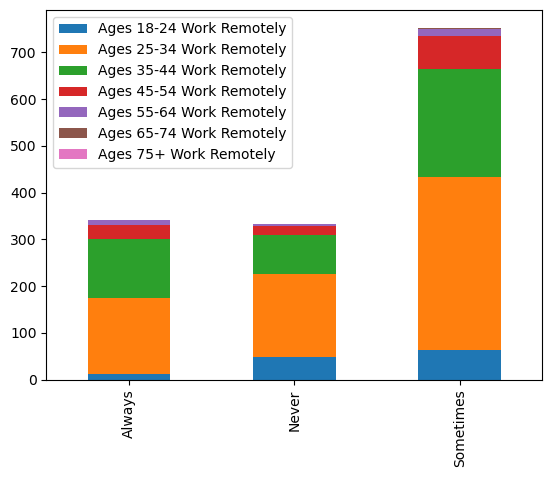

In [303]:
ages_remote_df.plot.bar(stacked=True)

# Age: #Would you HAVE BEEN willing to discuss a mental health issue with your direct supervisor(s)?

In [268]:
#Would you HAVE BEEN willing to discuss a mental health issue with your direct supervisor(s)?#Would you have been willing to discuss a mental health issue with your direct supervisor(s)?
#willing_discuss_mh_issue_prev_superv  [0]=Some, [1]=No, none, [2]=No Response, [3]=I don't know [4]=Yes, all
def age_willing_discuss_mh_issue_prev_superv(age_group):
    answers=[0,0,0,0,0]
    column_name="willing_discuss_mh_issue_prev_superv"
    answers[0] = ((clean_2016[column_name] == "Some of my previous employers") & (clean_2016["age groups"] == age_group)).sum()
    answers[1] = ((clean_2016[column_name] == "No, at none of my previous employers") & (clean_2016["age groups"] == age_group)).sum()
    answers[2] = ((clean_2016[column_name] == "No Response") & (clean_2016["age groups"] == age_group)).sum()
    answers[3] = ((clean_2016[column_name] == "I don't know") & (clean_2016["age groups"] == age_group)).sum()
    answers[4] = ((clean_2016[column_name] == "Yes, at all of my previous employers") & (clean_2016["age groups"] == age_group)).sum()
    return answers

In [269]:
#Would you have been willing to discuss a mental health issue with your direct supervisor(s)?
#willing_discuss_mh_issue_prev_superv  [0]=Some, [1]=No, none, [2]=No Response, [3]=I don't know [4]=Yes, all
ages_18_24_willing_discuss_mh_issue_prev_superv=age_willing_discuss_mh_issue_prev_superv("18-24")
ages_25_34_willing_discuss_mh_issue_prev_superv=age_willing_discuss_mh_issue_prev_superv("25-34")
ages_35_44_willing_discuss_mh_issue_prev_superv=age_willing_discuss_mh_issue_prev_superv("35-44")
ages_45_54_willing_discuss_mh_issue_prev_superv=age_willing_discuss_mh_issue_prev_superv("45-54")
ages_55_64_willing_discuss_mh_issue_prev_superv=age_willing_discuss_mh_issue_prev_superv("55-64")
ages_65_74_willing_discuss_mh_issue_prev_superv=age_willing_discuss_mh_issue_prev_superv("65-74")
over_75_willing_discuss_mh_issue_prev_superv=age_willing_discuss_mh_issue_prev_superv("75+")

In [270]:
#Would you have been willing to discuss a mental health issue with your direct supervisor(s)?
ages_willing_discuss_mh_issue_prev_superv_data={
    'Ages 18-24 willing_discuss_mh_issue_prev_superv':[ages_18_24_willing_discuss_mh_issue_prev_superv[0],
     ages_18_24_willing_discuss_mh_issue_prev_superv[1],
	 ages_18_24_willing_discuss_mh_issue_prev_superv[2],
	 ages_18_24_willing_discuss_mh_issue_prev_superv[3],
	 ages_18_24_willing_discuss_mh_issue_prev_superv[4]],
	'Ages 25-34 willing_discuss_mh_issue_prev_superv':[ages_25_34_willing_discuss_mh_issue_prev_superv[0],
     ages_25_34_willing_discuss_mh_issue_prev_superv[1],
	 ages_25_34_willing_discuss_mh_issue_prev_superv[2],
	 ages_25_34_willing_discuss_mh_issue_prev_superv[3],
	 ages_25_34_willing_discuss_mh_issue_prev_superv[4]], 
	'Ages 35-44 willing_discuss_mh_issue_prev_superv':[ages_35_44_willing_discuss_mh_issue_prev_superv[0],
     ages_35_44_willing_discuss_mh_issue_prev_superv[1],
	 ages_35_44_willing_discuss_mh_issue_prev_superv[2],
	 ages_35_44_willing_discuss_mh_issue_prev_superv[3],
	 ages_35_44_willing_discuss_mh_issue_prev_superv[4]],
	'Ages 45-54 willing_discuss_mh_issue_prev_superv':[ages_45_54_willing_discuss_mh_issue_prev_superv[0],
     ages_45_54_willing_discuss_mh_issue_prev_superv[1],
	 ages_45_54_willing_discuss_mh_issue_prev_superv[2],
	 ages_45_54_willing_discuss_mh_issue_prev_superv[3],
	 ages_45_54_willing_discuss_mh_issue_prev_superv[4]],
    'Ages 55-64 willing_discuss_mh_issue_prev_superv':[ages_55_64_willing_discuss_mh_issue_prev_superv[0],
     ages_55_64_willing_discuss_mh_issue_prev_superv[1],
	 ages_55_64_willing_discuss_mh_issue_prev_superv[2],
	 ages_55_64_willing_discuss_mh_issue_prev_superv[3],
	 ages_55_64_willing_discuss_mh_issue_prev_superv[4]],
	'Ages 65_74 willing_discuss_mh_issue_prev_superv':[ages_65_74_willing_discuss_mh_issue_prev_superv[0],
     ages_65_74_willing_discuss_mh_issue_prev_superv[1],
	 ages_65_74_willing_discuss_mh_issue_prev_superv[2],
	 ages_65_74_willing_discuss_mh_issue_prev_superv[3],
	 ages_65_74_willing_discuss_mh_issue_prev_superv[4]],
    'Ages 75+ willing_discuss_mh_issue_prev_superv':[over_75_willing_discuss_mh_issue_prev_superv[0],
     over_75_willing_discuss_mh_issue_prev_superv[1],
	 over_75_willing_discuss_mh_issue_prev_superv[2],
	 over_75_willing_discuss_mh_issue_prev_superv[3],
	 over_75_willing_discuss_mh_issue_prev_superv[4]],
}
ages_willing_discuss_mh_issue_prev_superv_labels = ['Some of my previous employers','No, at none of my previous employers','No Response','I do not know','Yes, at all of my previous employers']
ages_willing_discuss_mh_issue_prev_superv_df = pd.DataFrame(ages_willing_discuss_mh_issue_prev_superv_data)
ages_willing_discuss_mh_issue_prev_superv_df = ages_willing_discuss_mh_issue_prev_superv_df.set_index(pd.Index(ages_willing_discuss_mh_issue_prev_superv_labels))
ages_willing_discuss_mh_issue_prev_superv_df.head()



,Ages 18-24 willing_discuss_mh_issue_prev_superv,Ages 25-34 willing_discuss_mh_issue_prev_superv,Ages 35-44 willing_discuss_mh_issue_prev_superv,Ages 45-54 willing_discuss_mh_issue_prev_superv,Ages 55-64 willing_discuss_mh_issue_prev_superv,Ages 65_74 willing_discuss_mh_issue_prev_superv,Ages 75+ willing_discuss_mh_issue_prev_superv
Some of my previous employers,33,336,224,45,12,1,0
"No, at none of my previous employers",26,202,135,41,10,2,0
No Response,49,73,27,12,7,0,0
I do not know,12,43,29,13,2,1,0
"Yes, at all of my previous employers",3,56,27,7,0,0,0


<Axes: >

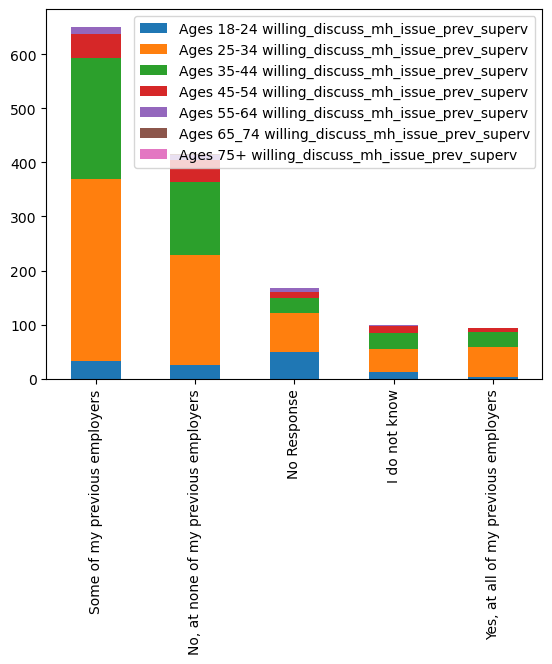

In [304]:
ages_willing_discuss_mh_issue_prev_superv_df.plot.bar(stacked=True)

# #Do you currently have a mental health disorder?

In [276]:
#Do you currently have a mental health disorder?
def age_disorder_current(age_group):
    answers=[0,0,0]
    column_name="disorder_current"
    answers[0] = ((clean_2016[column_name] == "Yes") & (clean_2016["age groups"] == age_group)).sum()
    answers[1] = ((clean_2016[column_name] == "No") & (clean_2016["age groups"] == age_group)).sum()
    answers[2] = ((clean_2016[column_name] == "Maybe") & (clean_2016["age groups"] == age_group)).sum()
    return answers

In [277]:
#Ages: Do you currently have a mental health disorder?
#remote [0]=yes,[1]=no,[2]=maybe
ages_18_24_disorder_current=age_disorder_current("18-24")
ages_25_34_disorder_current=age_disorder_current("25-34")
ages_35_44_disorder_current=age_disorder_current("35-44")
ages_45_54_disorder_current=age_disorder_current("45-54")
ages_55_64_disorder_current=age_disorder_current("55-64")
ages_65_74_disorder_current=age_disorder_current("65-74")
over_75_disorder_current=age_disorder_current("75+")

In [278]:
ages_disorder_current_data={
    'Ages 18-24 disorder_current':
    [ages_18_24_disorder_current[0],
     ages_18_24_disorder_current[1],
	 ages_18_24_disorder_current[2]],
	'Ages 25-34 disorder_current':
    [ages_25_34_disorder_current[0],
     ages_25_34_disorder_current[1],
	 ages_25_34_disorder_current[2]], 
	'Ages 35-44 disorder_current':
    [ages_35_44_disorder_current[0],
     ages_35_44_disorder_current[1],
	 ages_35_44_disorder_current[2]],
	'Ages 45-54 disorder_current':
    [ages_45_54_disorder_current[0],
     ages_45_54_disorder_current[1],
	 ages_45_54_disorder_current[2]],
    'Ages 55-64 disorder_current':
    [ages_55_64_disorder_current[0],
     ages_55_64_disorder_current[1],
	 ages_55_64_disorder_current[2]],
	'Ages 65_74 disorder_current':
    [ages_65_74_disorder_current[0],
     ages_65_74_disorder_current[1],
	 ages_65_74_disorder_current[2]],
    'Ages 75+ disorder_current':
    [over_75_disorder_current[0],
     over_75_disorder_current[1],
	 over_75_disorder_current[2]]
}
ages_disorder_current_labels = ['yes','no','maybe']
ages_disorder_current_df = pd.DataFrame(ages_disorder_current_data)
ages_disorder_current_df = ages_disorder_current_df.set_index(pd.Index(ages_disorder_current_labels))
ages_disorder_current_df.head()


,Ages 18-24 disorder_current,Ages 25-34 disorder_current,Ages 35-44 disorder_current,Ages 45-54 disorder_current,Ages 55-64 disorder_current,Ages 65_74 disorder_current,Ages 75+ disorder_current
yes,55,280,175,47,14,3,0
no,44,269,158,46,10,1,0
maybe,24,161,109,25,7,0,0


<Axes: >

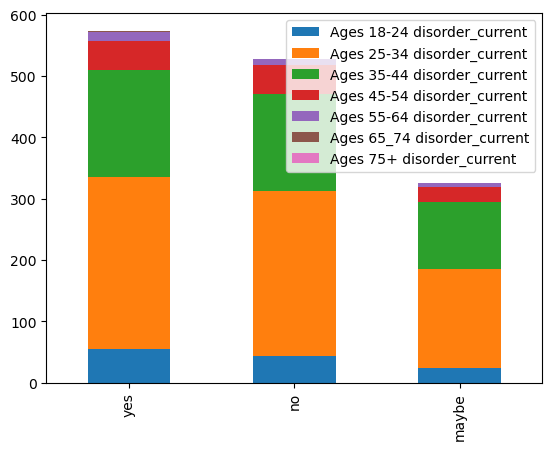

In [305]:
ages_disorder_current_df.plot.bar(stacked=True)

# #Have you had a mental health disorder in the past?

In [279]:
#Have you had a mental health disorder in the past?
def age_disorder_past(age_group):
    answers=[0,0,0]
    column_name="disorder_past"
    yes = ((clean_2016[column_name] == "Yes") & (clean_2016["age groups"] == age_group)).sum()
    no = ((clean_2016[column_name] == "No") & (clean_2016["age groups"] == age_group)).sum()
    maybe = ((clean_2016[column_name] == "Maybe") & (clean_2016["age groups"] == age_group)).sum()
    answers[0]=yes
    answers[1]=no
    answers[2]=maybe
    return answers

In [280]:
#Ages: Did you previously have a mental health disorder?
#remote [0]=yes,[1]=no,[2]=maybe
ages_18_24_disorder_past=age_disorder_past("18-24")
ages_25_34_disorder_past=age_disorder_past("25-34")
ages_35_44_disorder_past=age_disorder_past("35-44")
ages_45_54_disorder_past=age_disorder_past("45-54")
ages_55_64_disorder_past=age_disorder_past("55-64")
ages_65_74_disorder_past=age_disorder_past("65-74")
over_75_disorder_past=age_disorder_past("75+")

In [281]:
ages_disorder_past_data={
    'Ages 18-24 disorder_past':
    [ages_18_24_disorder_past[0],
     ages_18_24_disorder_past[1],
	 ages_18_24_disorder_past[2]],
	'Ages 25-34 disorder_past':
    [ages_25_34_disorder_past[0],
     ages_25_34_disorder_past[1],
	 ages_25_34_disorder_past[2]], 
	'Ages 35-44 disorder_past':
    [ages_35_44_disorder_past[0],
     ages_35_44_disorder_past[1],
	 ages_35_44_disorder_past[2]],
	'Ages 45-54 disorder_past':
    [ages_45_54_disorder_past[0],
     ages_45_54_disorder_past[1],
	 ages_45_54_disorder_past[2]],
    'Ages 55-64 disorder_past':
    [ages_55_64_disorder_past[0],
     ages_55_64_disorder_past[1],
	 ages_55_64_disorder_past[2]],
	'Ages 65_74 disorder_past':
    [ages_65_74_disorder_past[0],
     ages_65_74_disorder_past[1],
	 ages_65_74_disorder_past[2]],
    'Ages 75+ disorder_past':
    [over_75_disorder_past[0],
     over_75_disorder_past[1],
	 over_75_disorder_past[2]]
}
ages_disorder_past_labels = ['yes','no','maybe']
ages_disorder_past_df = pd.DataFrame(ages_disorder_past_data)
ages_disorder_past_df = ages_disorder_past_df.set_index(pd.Index(ages_disorder_past_labels))
ages_disorder_past_df.head()

,Ages 18-24 disorder_past,Ages 25-34 disorder_past,Ages 35-44 disorder_past,Ages 45-54 disorder_past,Ages 55-64 disorder_past,Ages 65_74 disorder_past,Ages 75+ disorder_past
yes,55,364,220,74,18,3,0
no,50,226,132,31,8,1,0
maybe,18,120,90,13,5,0,0


<Axes: >

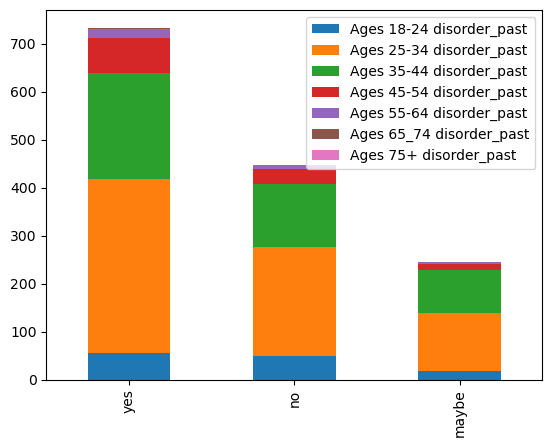

In [307]:
ages_disorder_past_df.plot.bar(stacked=True)

# #Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?

In [282]:
#Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?
def age_comf_discuss_mh_disorder_cur_superv(age_group):
    answers=[0,0,0,0]
    column_name="comf_discuss_mh_disorder_cur_superv"
    yes = ((clean_2016[column_name] == "Yes") & (clean_2016["age groups"] == age_group)).sum()
    no = ((clean_2016[column_name] == "No") & (clean_2016["age groups"] == age_group)).sum()
    maybe = ((clean_2016[column_name] == "Maybe") & (clean_2016["age groups"] == age_group)).sum()
    no_response = ((clean_2016[column_name] == "No Response") & (clean_2016["age groups"] == age_group)).sum()
    answers[0]=yes
    answers[1]=no
    answers[2]=maybe
    answers[3]=no_response
    print(f"Ages {age_group}: Yes: {yes} No: {no} Maybe: {maybe} No Response: {no_response}")   
    return answers

In [283]:
#Ages: Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?
#comf_discuss_mh_disorder_cur_superv [0]=yes,[1]=no, [2]=maybe, [3]=no ressponse
ages_18_24_comf_discuss_mh_disorder_cur_superv=age_comf_discuss_mh_disorder_cur_superv("18-24")
ages_25_34_comf_discuss_mh_disorder_cur_superv=age_comf_discuss_mh_disorder_cur_superv("25-34")
ages_35_44_comf_discuss_mh_disorder_cur_superv=age_comf_discuss_mh_disorder_cur_superv("35-44")
ages_45_54_comf_discuss_mh_disorder_cur_superv=age_comf_discuss_mh_disorder_cur_superv("45-54")
ages_55_64_comf_discuss_mh_disorder_cur_superv=age_comf_discuss_mh_disorder_cur_superv("55-64")
ages_65_74_comf_discuss_mh_disorder_cur_superv=age_comf_discuss_mh_disorder_cur_superv("65-74")
over_75_comf_discuss_mh_disorder_cur_superv=age_comf_discuss_mh_disorder_cur_superv("75+")

Ages 18-24: Yes: 33 No: 47 Maybe: 31 No Response: 12
Ages 25-34: Yes: 224 No: 162 Maybe: 204 No Response: 120
Ages 35-44: Yes: 133 No: 91 Maybe: 117 No Response: 101
Ages 45-54: Yes: 26 No: 30 Maybe: 25 No Response: 37
Ages 55-64: Yes: 7 No: 5 Maybe: 4 No Response: 15
Ages 65-74: Yes: 2 No: 1 Maybe: 0 No Response: 1
Ages 75+: Yes: 0 No: 0 Maybe: 0 No Response: 0


In [284]:
ages_comf_discuss_mh_disorder_cur_superv_data={
    'Ages 18-24 comf_discuss_mh_disorder_cur_superv':
    [ages_18_24_comf_discuss_mh_disorder_cur_superv[0],
     ages_18_24_comf_discuss_mh_disorder_cur_superv[1],
	 ages_18_24_comf_discuss_mh_disorder_cur_superv[2],
	 ages_18_24_comf_discuss_mh_disorder_cur_superv[3]],
	'Ages 25-34 comf_discuss_mh_disorder_cur_superv':
    [ages_25_34_comf_discuss_mh_disorder_cur_superv[0],
     ages_25_34_comf_discuss_mh_disorder_cur_superv[1],
	 ages_25_34_comf_discuss_mh_disorder_cur_superv[2],
	 ages_25_34_comf_discuss_mh_disorder_cur_superv[3]],
	'Ages 35-44 comf_discuss_mh_disorder_cur_superv':
    [ages_35_44_comf_discuss_mh_disorder_cur_superv[0],
     ages_35_44_comf_discuss_mh_disorder_cur_superv[1],
	 ages_35_44_comf_discuss_mh_disorder_cur_superv[2],
	 ages_35_44_comf_discuss_mh_disorder_cur_superv[3]],
	'Ages 45-54 comf_discuss_mh_disorder_cur_superv':
    [ages_45_54_comf_discuss_mh_disorder_cur_superv[0],
     ages_45_54_comf_discuss_mh_disorder_cur_superv[1],
	 ages_45_54_comf_discuss_mh_disorder_cur_superv[2],
	 ages_45_54_comf_discuss_mh_disorder_cur_superv[3]],
    'Ages 55-64 comf_discuss_mh_disorder_cur_superv':
    [ages_55_64_comf_discuss_mh_disorder_cur_superv[0],
     ages_55_64_comf_discuss_mh_disorder_cur_superv[1],
	 ages_55_64_comf_discuss_mh_disorder_cur_superv[2],
	 ages_55_64_comf_discuss_mh_disorder_cur_superv[3]],
	'Ages 65_74 comf_discuss_mh_disorder_cur_superv':
    [ages_65_74_comf_discuss_mh_disorder_cur_superv[0],
     ages_65_74_comf_discuss_mh_disorder_cur_superv[1],
	 ages_65_74_comf_discuss_mh_disorder_cur_superv[2],
	 ages_65_74_comf_discuss_mh_disorder_cur_superv[3]],
    'Ages 75+ comf_discuss_mh_disorder_cur_superv':
    [over_75_comf_discuss_mh_disorder_cur_superv[0],
     over_75_comf_discuss_mh_disorder_cur_superv[1],
	 over_75_comf_discuss_mh_disorder_cur_superv[2],
	 over_75_comf_discuss_mh_disorder_cur_superv[3]],
}
ages_comf_discuss_mh_disorder_cur_superv_labels = ['Yes','No','Maybe','No Response']
ages_comf_discuss_mh_disorder_cur_superv_df = pd.DataFrame(ages_comf_discuss_mh_disorder_cur_superv_data)
ages_comf_discuss_mh_disorder_cur_superv_df = ages_comf_discuss_mh_disorder_cur_superv_df.set_index(pd.Index(ages_comf_discuss_mh_disorder_cur_superv_labels))
ages_comf_discuss_mh_disorder_cur_superv_df.head()


,Ages 18-24 comf_discuss_mh_disorder_cur_superv,Ages 25-34 comf_discuss_mh_disorder_cur_superv,Ages 35-44 comf_discuss_mh_disorder_cur_superv,Ages 45-54 comf_discuss_mh_disorder_cur_superv,Ages 55-64 comf_discuss_mh_disorder_cur_superv,Ages 65_74 comf_discuss_mh_disorder_cur_superv,Ages 75+ comf_discuss_mh_disorder_cur_superv
Yes,33,224,133,26,7,2,0
No,47,162,91,30,5,1,0
Maybe,31,204,117,25,4,0,0
No Response,12,120,101,37,15,1,0


<Axes: >

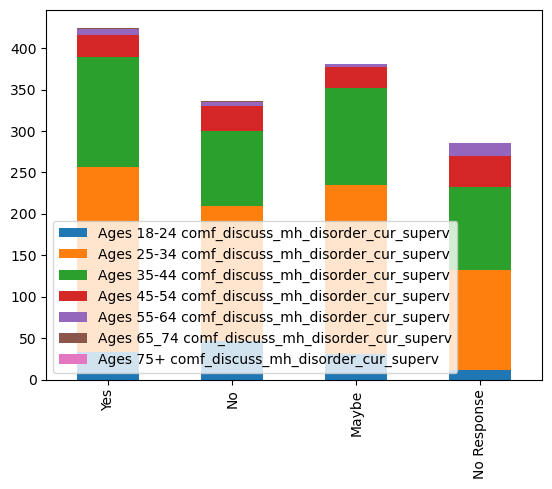

In [308]:
ages_comf_discuss_mh_disorder_cur_superv_df.plot.bar(stacked=True)

In [13]:
# export clean_2016 as a new csv file
#filepath = Path('Resources/2016-cleaned.csv')
#clean_2016.to_csv(filepath)